# Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from sklearn.cluster import KMeans



/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Cleaning and analysis

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [3]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## Dataframe description
Content
Attributes
People
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

Promotion
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Checking the null values in the columns

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Checking the information of all the columns (null count and data type)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Since there are very less numbers rows with null values we will drop them

In [7]:
df.dropna()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2216 rows x 29 columns]

In [8]:
## converting Dt_customer to datetime data type

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [9]:
## checking the days the customer has been engaged with the business relative to the lates customer

df['customer_for'] = pd.to_numeric(df['Dt_Customer'].max() - df['Dt_Customer'],errors="coerce")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response       customer_for  
0         11         1  57283200000000000  
1         11         0   9763200000000000  
2         11         0  26956800000000000  
3         11         0  12009600000000000  
4         11         0  13910400000000000  

[5 rows x 30 columns]

### Grouping by marital status

In [10]:
## Grouping by mariatal status

Marital_status_count = df.groupby('Marital_Status').size()
Marital_status_count

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

### Plotting the histogram for marital status

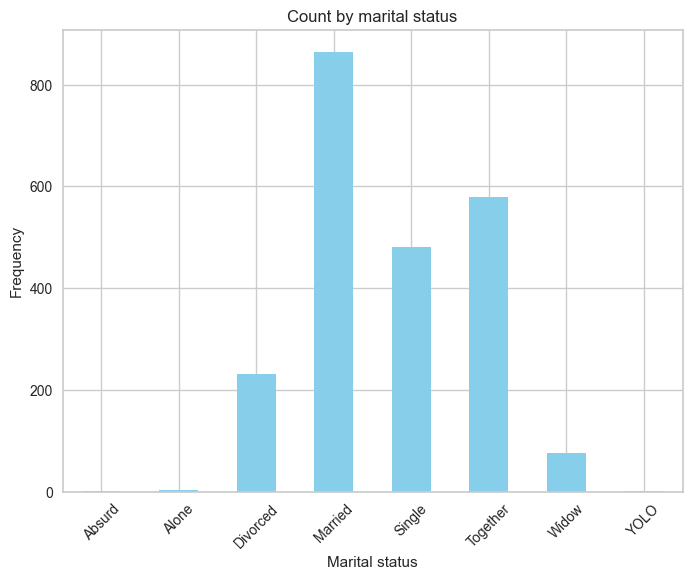

In [11]:
## plotting the same for 

plt.figure(figsize=(8, 6))
Marital_status_count.plot(kind='bar', color='skyblue')
plt.title('Count by marital status')
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Grouping by education qualification

In [12]:
## grouping by education qualification

Education_count = df.groupby('Education').size()
Education_count

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

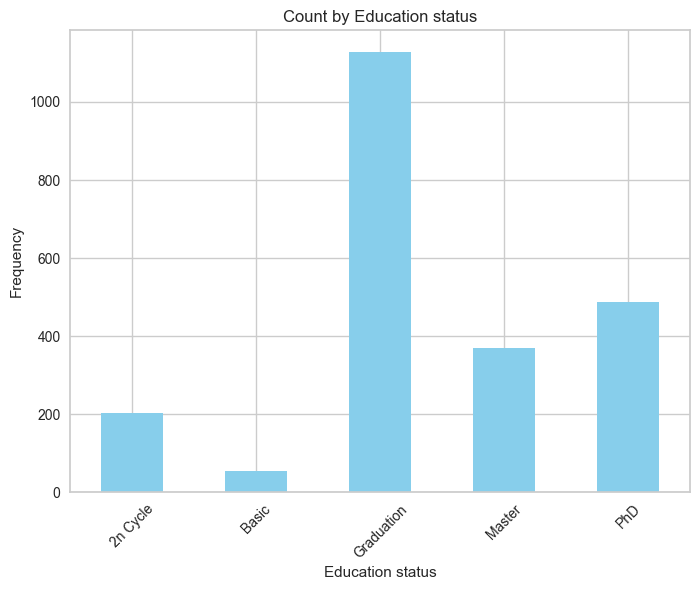

In [13]:
plt.figure(figsize=(8, 6))
Education_count.plot(kind='bar', color='skyblue')
plt.title('Count by Education status')
plt.xlabel('Education status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Checking the income values such as mean, max, min std etc.

In [14]:
## to find the range within the income column

df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [15]:
## function to separate the records by income range

def define_income(df):
    for index, income in enumerate(df['Income']):
        if income < 36000:
            df.loc[index, 'income_range'] = '0-36000'
        elif income < 52000:
            df.loc[index, 'income_range'] = '36000-52000'
        elif income < 69000:
            df.loc[index, 'income_range'] = '52000-69000'
        else:
            df.loc[index, 'income_range'] = '69000+'

define_income(df)
        

In [16]:
## grouping by the income range

Income_range_group = df.groupby('income_range').size()
Income_range_group

income_range
0-36000        582
36000-52000    543
52000-69000    547
69000+         568
dtype: int64

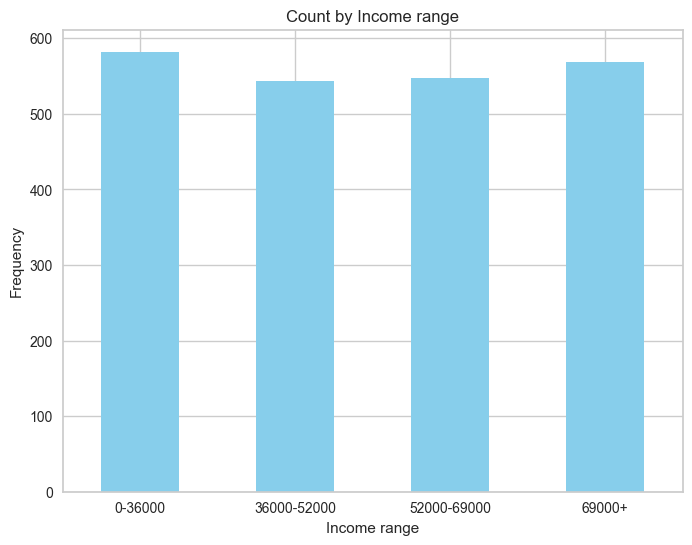

In [17]:
plt.figure(figsize=(8, 6))
Income_range_group.plot(kind='bar', color='skyblue')
plt.title('Count by Income range')
plt.xlabel('Income range')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

In [18]:
from datetime import datetime

age = datetime.now().year - df['Year_Birth']
age_df = pd.DataFrame({'Age': age})
age_df

Age
0      67
1      70
2      59
3      40
4      43
...   ...
2235   57
2236   78
2237   43
2238   68
2239   70

[2240 rows x 1 columns]

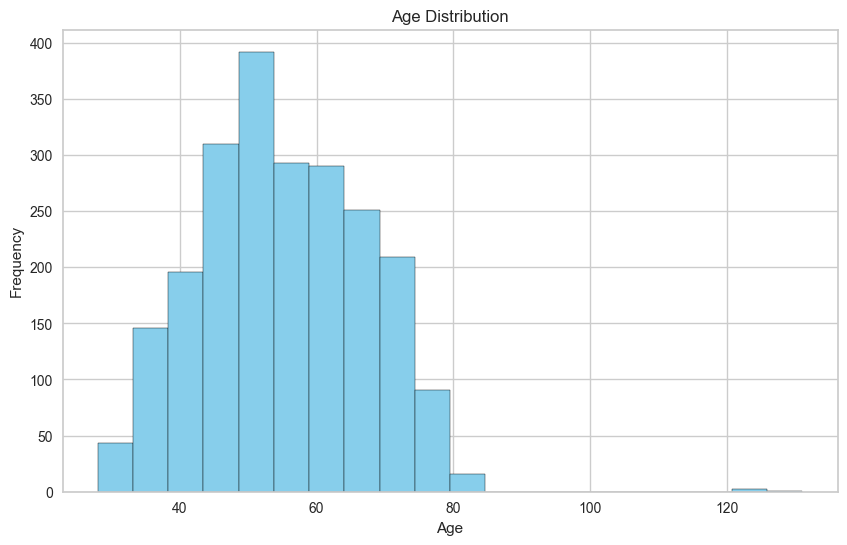

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(age_df['Age'], bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Feature enginering

In [20]:
## Total amount spent by each entries in the dataset

df['totalspent'] = df['MntWines'] + df['MntFruits'] +  df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


## finding the age of each rows

df['Age'] = datetime.now().year - df['Year_Birth']


## Evaluating the living situation whether they are living alone or with a partner 
##labeling alone as 0 and with partner as 1

df['Living_status'] = df.Marital_Status.replace({"Married":2, "Together":2
                                                 , "Absurd":1, 
                                                 "Widow":1, "YOLO":1, 
                                                 "Divorced":1, "Single":1, "Alone":1})


## total number of children in the household

df['total_child']=df['Kidhome']+df['Teenhome']


## total people in the household

df['family_size'] = df['Living_status'] + df['total_child']


## checking the person is a parent or not

df['is_parent'] = np.where(df.total_child > 0,1,0)

#Segmenting education levels in three groups labeling undergradueates as 0, graduates as 1 and post graduates as 2
df["Education"]=df["Education"].replace({"Basic":0,"2n Cycle":0,
                                             "Graduation":1, 
                                             "Master":2, "PhD":2})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","income_range"]
df = df.drop(to_drop, axis=1)



/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_51598/619386254.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Living_status'] = df.Marital_Status.replace({"Married":2, "Together":2
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_51598/619386254.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education"]=df["Education"].replace({"Basic":0,"2n Cycle":0,


In [21]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          1  58138.0        0         0       58       635         88   
1          1  46344.0        1         1       38        11          1   
2          1  71613.0        0         0       26       426         49   
3          1  26646.0        1         0       26        11          4   
4          2  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   Complain  Response       customer_for  totalspent  Age  Living_status  \
0         0         1  57283200000000000        1617   67              1   
1         0         0   9763200000000000          27   70              1   
2         0         0  26956800000000000         776   59              2   
3         0         0  12009600000000000          53   40              2   
4         0         0  13910400000000000         422   43              2   

   total_child  family_size  is_parent  
0            0            1          0  
1            2            3          1  
2            0            2          0  
3            1            3          1  
4            1            3          1  

[5 rows x 30 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

Reletive Plot Of Some Selected Features: A Data Subset


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

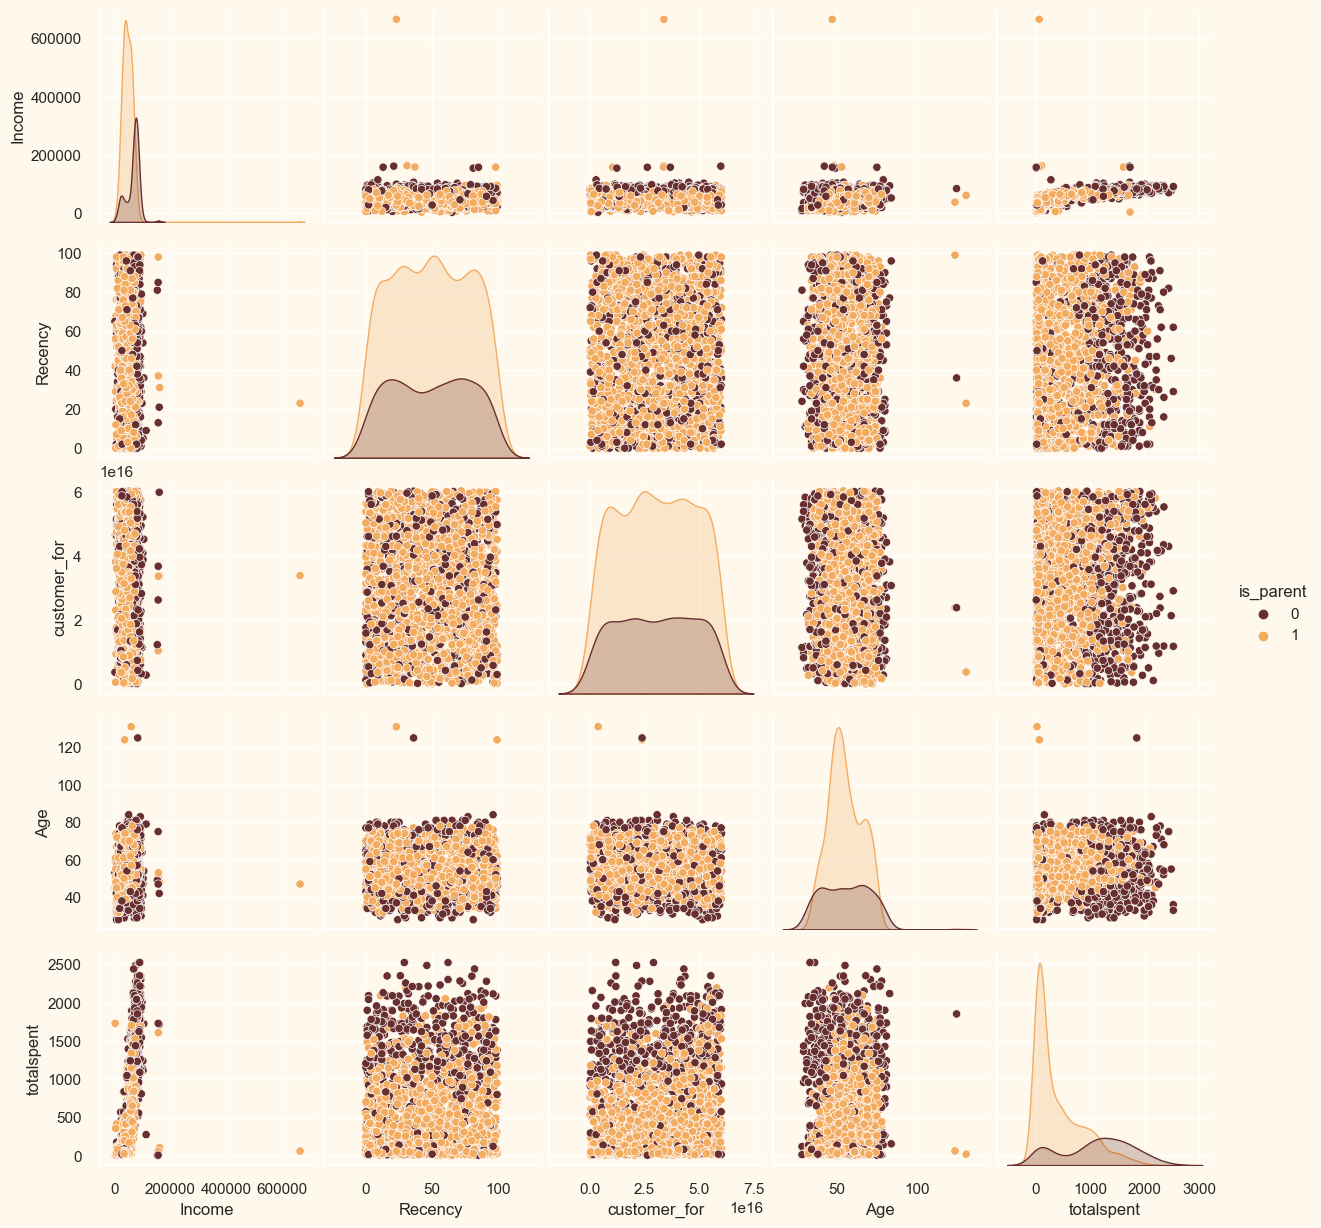

In [23]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "customer_for", "Age", "totalspent", "is_parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

### From the sns plot above we can clearly see that there are outliers in the age and income column

In [24]:
len(df[(df["Age"]>90)])

3

In [25]:
len(df[(df["Income"]>100000)])

13

#### From the outcomes above we can see that the number of datapoints with age above 90 and income above 100000 is very minimal so we might want to remove them

In [26]:
#Dropping the outliers by setting a cap on Age and income. 
# we are setting the age limit to be being lesser than 90
# the income should be below 100000

df = df[(df["Age"]<90)]
df = df[(df["Income"]<100000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2200


Reletive Plot Of Some Selected Features: A Data Subset


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

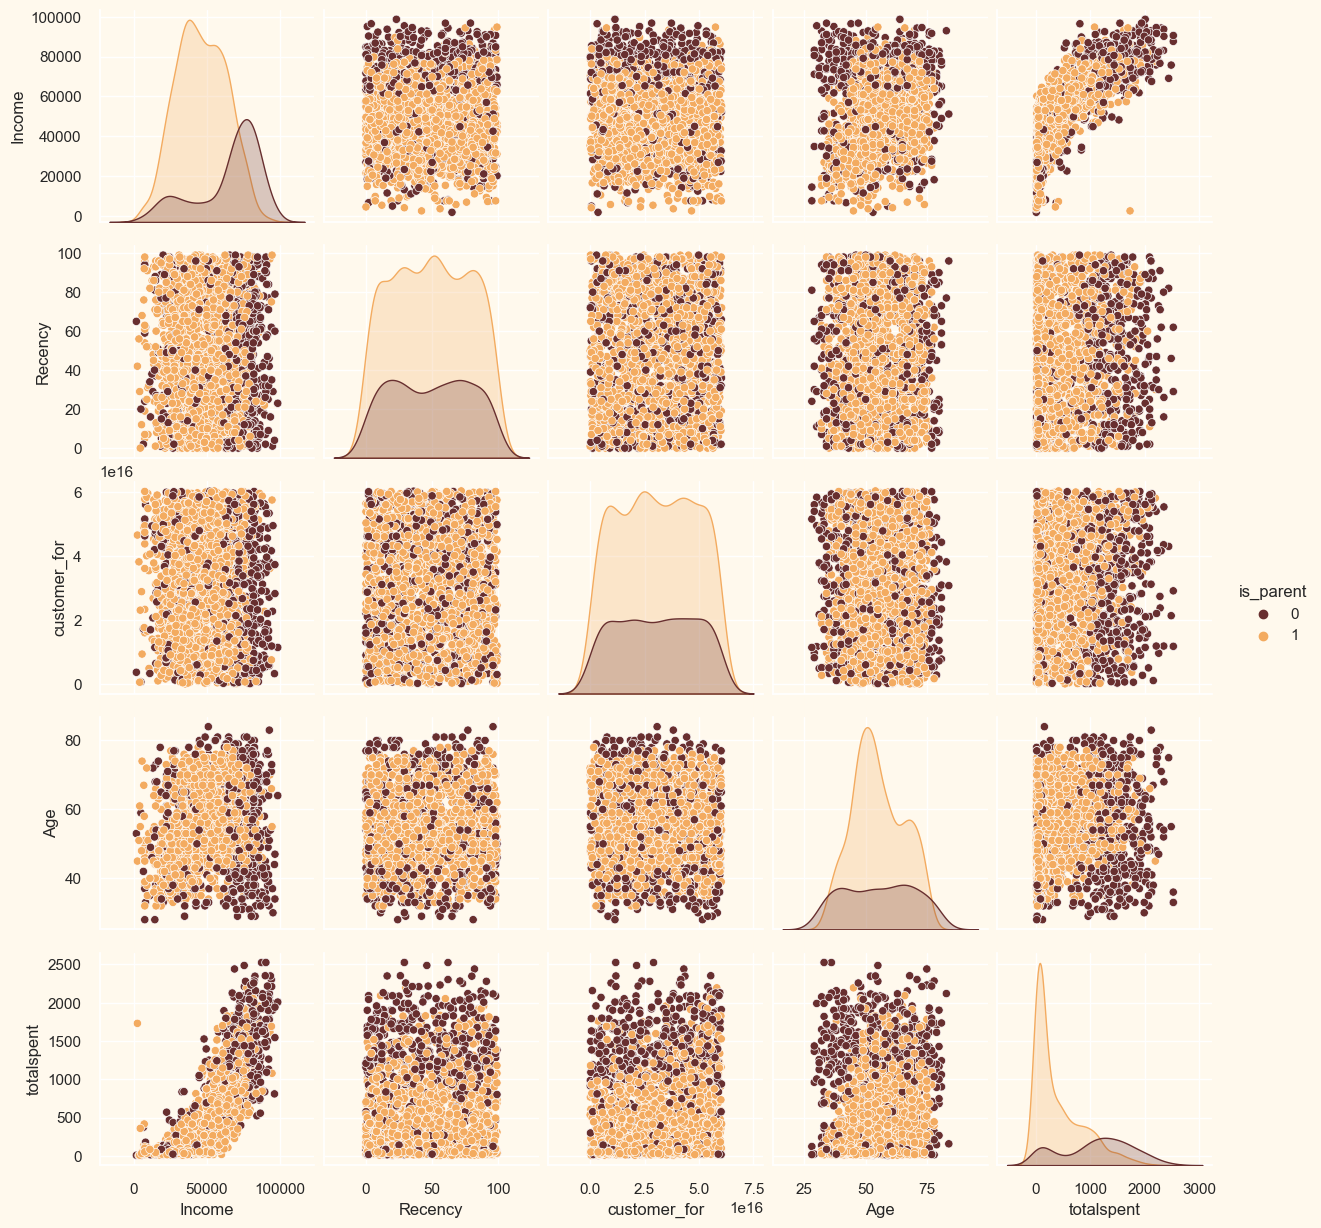

In [27]:
To_Plot = [ "Income", "Recency", "customer_for", "Age", "totalspent", "is_parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

### Plotting the correlation matrix

In [28]:
corrmat = df.corr()
corrmat

Education    Income   Kidhome  Teenhome   Recency  \
Education             1.000000  0.153306 -0.041173  0.126206 -0.016340   
Income                0.153306  1.000000 -0.531349  0.048376  0.009971   
Kidhome              -0.041173 -0.531349  1.000000 -0.042022  0.010917   
Teenhome              0.126206  0.048376 -0.042022  1.000000  0.012855   
Recency              -0.016340  0.009971  0.010917  0.012855  1.000000   
MntWines              0.198739  0.733915 -0.499391  0.004222  0.015612   
MntFruits            -0.080597  0.537798 -0.374392 -0.175376 -0.002414   
MntMeatProducts       0.040580  0.708703 -0.446311 -0.267653  0.026642   
MntFishProducts      -0.106742  0.553848 -0.389940 -0.205755  0.001211   
MntSweetProducts     -0.111119  0.550466 -0.379374 -0.160746  0.031361   
MntGoldProds         -0.085930  0.414913 -0.355843 -0.016738  0.019432   
NumDealsPurchases     0.029836 -0.126955  0.224839  0.392935 -0.000548   
NumWebPurchases       0.082958  0.499326 -0.377670  0.169651  0.000707   
NumCatalogPurchases   0.065118  0.710337 -0.519625 -0.111457  0.030503   
NumStorePurchases     0.082863  0.689025 -0.506896  0.050189  0.000526   
NumWebVisitsMonth    -0.048427 -0.647208  0.447408  0.127155 -0.019771   
AcceptedCmp3         -0.001111 -0.009594  0.015382 -0.043868 -0.032687   
AcceptedCmp4          0.061921  0.225873 -0.160341  0.042503  0.018661   
AcceptedCmp5          0.033011  0.408524 -0.202401 -0.187207  0.001980   
AcceptedCmp1         -0.010813  0.335387 -0.171546 -0.141427 -0.019622   
AcceptedCmp2          0.013919  0.103729 -0.080510 -0.012623  0.004517   
Complain             -0.039158 -0.027134  0.036875  0.007438  0.005656   
Response              0.086792  0.166903 -0.075465 -0.152297 -0.200742   
customer_for         -0.060104 -0.026517 -0.055270  0.020097  0.027624   
totalspent            0.096227  0.826781 -0.557939 -0.137172  0.022139   
Age                   0.193303  0.214493 -0.238751  0.363634  0.015661   
Living_status        -0.013470 -0.009354  0.025969  0.031468 -0.000899   
total_child           0.062228 -0.346154  0.687109  0.697038  0.017183   
family_size           0.044353 -0.291278  0.582095  0.593215  0.013738   
is_parent             0.027786 -0.405494  0.518525  0.586260  0.000316   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education            0.198739  -0.080597         0.040580        -0.106742   
Income               0.733915   0.537798         0.708703         0.553848   
Kidhome             -0.499391  -0.374392        -0.446311        -0.389940   
Teenhome             0.004222  -0.175376        -0.267653        -0.205755   
Recency              0.015612  -0.002414         0.026642         0.001211   
MntWines             1.000000   0.384466         0.595050         0.394014   
MntFruits            0.384466   1.000000         0.570148         0.591882   
MntMeatProducts      0.595050   0.570148         1.000000         0.597615   
MntFishProducts      0.394014   0.591882         0.597615         1.000000   
MntSweetProducts     0.394996   0.578904         0.564692         0.593243   
MntGoldProds         0.388323   0.387987         0.376832         0.423700   
NumDealsPurchases    0.013888  -0.134462        -0.166257        -0.143848   
NumWebPurchases      0.563919   0.305944         0.338271         0.303446   
NumCatalogPurchases  0.673153   0.511850         0.716778         0.563213   
NumStorePurchases    0.639033   0.456121         0.518590         0.455977   
NumWebVisitsMonth   -0.329613  -0.424501        -0.544851        -0.454280   
AcceptedCmp3         0.061259   0.015041         0.021217        -0.000443   
AcceptedCmp4         0.373649   0.001488         0.096158         0.014835   
AcceptedCmp5         0.472126   0.200620         0.393017         0.190954   
AcceptedCmp1         0.349188   0.183287         0.328760         0.258920   
AcceptedCmp2         0.211935  -0.022277         0.041534         0.002712   
Complain  

### We can see that all the values are numeric

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2200 non-null   int64  
 1   Income               2200 non-null   float64
 2   Kidhome              2200 non-null   int64  
 3   Teenhome             2200 non-null   int64  
 4   Recency              2200 non-null   int64  
 5   MntWines             2200 non-null   int64  
 6   MntFruits            2200 non-null   int64  
 7   MntMeatProducts      2200 non-null   int64  
 8   MntFishProducts      2200 non-null   int64  
 9   MntSweetProducts     2200 non-null   int64  
 10  MntGoldProds         2200 non-null   int64  
 11  NumDealsPurchases    2200 non-null   int64  
 12  NumWebPurchases      2200 non-null   int64  
 13  NumCatalogPurchases  2200 non-null   int64  
 14  NumStorePurchases    2200 non-null   int64  
 15  NumWebVisitsMonth    2200 non-null   int64 

# Data scaling

Initially we will be dropping the following columns: (as they will not be contributing towards the further results)
1. AcceptedCmp3',
2. 'AcceptedCmp4', 
3. 'AcceptedCmp5', 
4. 'AcceptedCmp1',
5. 'AcceptedCmp2',
6. 'Complain'
7. 'Response'

In [30]:
df1 = df.copy()
df1 = df1.drop(['AcceptedCmp3', 'AcceptedCmp4', 
         'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'], axis=1)
df1.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          1  58138.0        0         0       58       635         88   
1          1  46344.0        1         1       38        11          1   
2          1  71613.0        0         0       26       426         49   
3          1  26646.0        1         0       26        11          4   
4          2  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              546              172                88  ...   
1                6                2                 1  ...   
2              127              111                21  ...   
3               20               10                 3  ...   
4              118               46                27  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                   10                  4                  7   
1                    1                  2                  5   
2                    2                 10                  4   
3                    0                  4                  6   
4                    3                  6                  5   

        customer_for  totalspent  Age  Living_status  total_child  \
0  57283200000000000        1617   67              1            0   
1   9763200000000000          27   70              1            2   
2  26956800000000000         776   59              2            0   
3  12009600000000000          53   40              2            1   
4  13910400000000000         422   43              2            1   

   family_size  is_parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1  

[5 rows x 23 columns]

In [31]:
## initializing a standrd scaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
df1_scaled = pd.DataFrame(scaler.transform(df1),columns= df1.columns)

df1_scaled.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.408821  0.322649 -0.824976 -0.932743  0.309694  0.976910   1.558576   
1  -0.408821 -0.250642  1.036508  0.904351 -0.381727 -0.873971  -0.638639   
2  -0.408821  0.977651 -0.824976 -0.932743 -0.796580  0.356983   0.573618   
3  -0.408821 -1.208136  1.036508 -0.932743 -0.796580 -0.873971  -0.562873   
4   1.126003  0.330184  1.036508 -0.932743  1.554251 -0.393454   0.422086   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         1.747283         2.453291          1.505314  ...   
1        -0.731316        -0.651699         -0.637060  ...   
2        -0.175926         1.339147         -0.144560  ...   
3        -0.667056        -0.505582         -0.587810  ...   
4        -0.217236         0.151945          0.003190  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  customer_for  \
0             2.640049          -0.561730           0.686955      1.528008   
1            -0.586478          -1.180872          -0.142519     -1.188012   
2            -0.227975           1.295695          -0.557255     -0.205306   
3            -0.944982          -0.561730           0.272218     -1.059618   
4             0.130528           0.057411          -0.142519     -0.950978   

   totalspent       Age  Living_status  total_child  family_size  is_parent  
0    1.681690  1.017315      -1.349264    -1.270346    -1.764077  -1.591006  
1   -0.962337  1.273732      -1.349264     1.401510     0.446042   0.628533  
2    0.283183  0.333536       0.741145    -1.270346    -0.659017  -1.591006  
3   -0.919101 -1.290438       0.741145     0.065582     0.446042   0.628533  
4   -0.305487 -1.034021       0.741145     0.065582     0.446042   0.628533  

[5 rows x 23 columns]

In [32]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df1_scaled)
PCA_df1 = pd.DataFrame(pca.transform(df1_scaled), columns=(["col1","col2", "col3"]))
PCA_df1.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2200.0  5.813531e-17  2.902063 -6.018458 -2.560133 -0.801527  2.417354   
col2  2200.0 -3.229740e-17  1.728973 -4.280591 -1.337045 -0.160801  1.254777   
col3  2200.0  1.291896e-17  1.256521 -3.397899 -0.842634 -0.017502  0.839495   

           max  
col1  7.583697  
col2  6.344803  
col3  6.119224

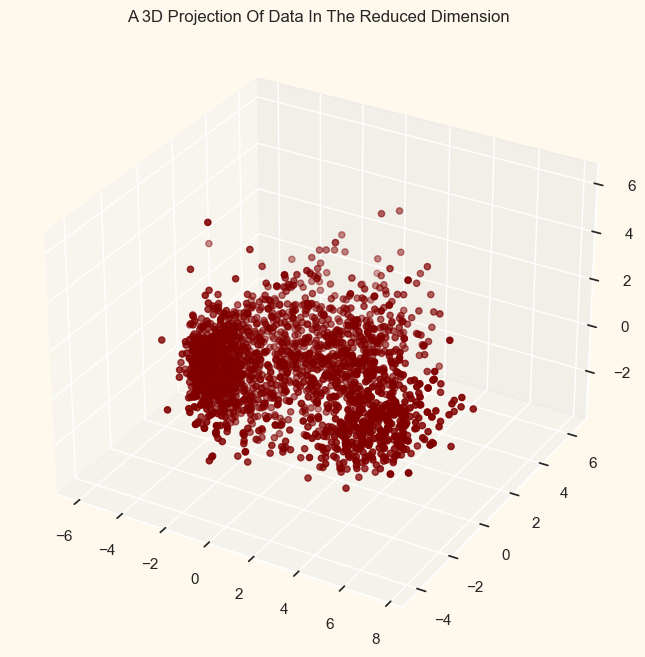

In [33]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df1["col1"]
y =PCA_df1["col2"]
z =PCA_df1["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

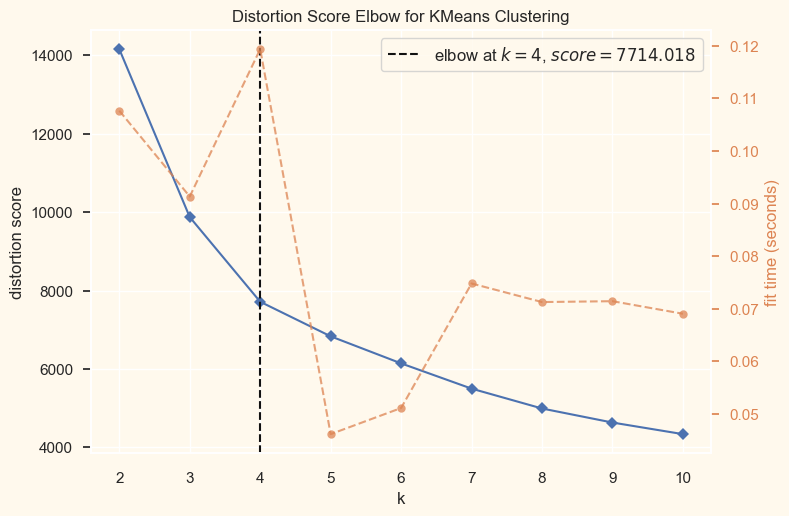

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df1)
Elbow_M.show()

In [35]:
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(PCA_df1)
PCA_df1["Clusters"] = y_predict
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y_predict

# #Initiating the Agglomerative Clustering model 
# AC = AgglomerativeClustering(n_clusters=4)
# # fit model and predict clusters
# yhat_AC = AC.fit_predict(PCA_df1)
# PCA_df1["Clusters"] = yhat_AC
# #Adding the Clusters feature to the orignal dataframe.
# df["Clusters"]= yhat_AC

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


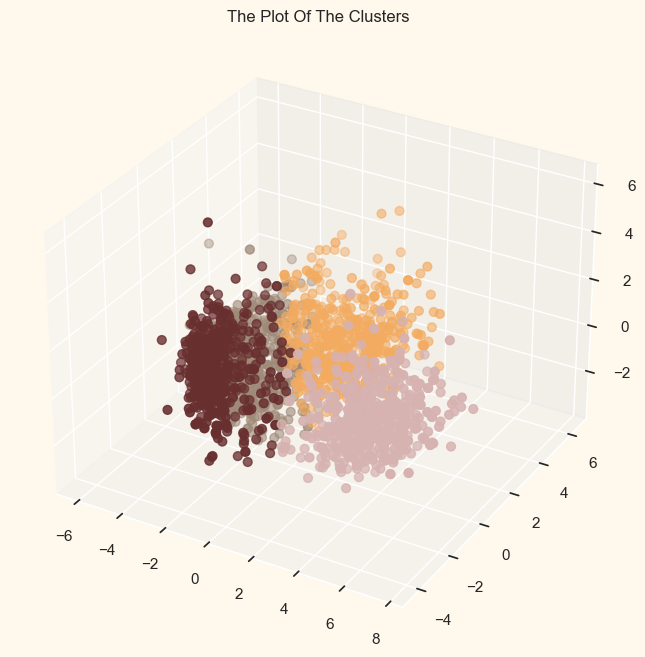

In [36]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df1["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

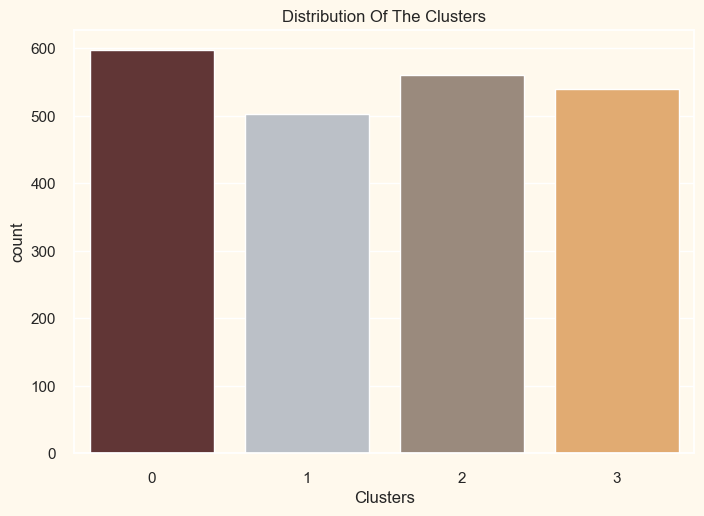

In [37]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

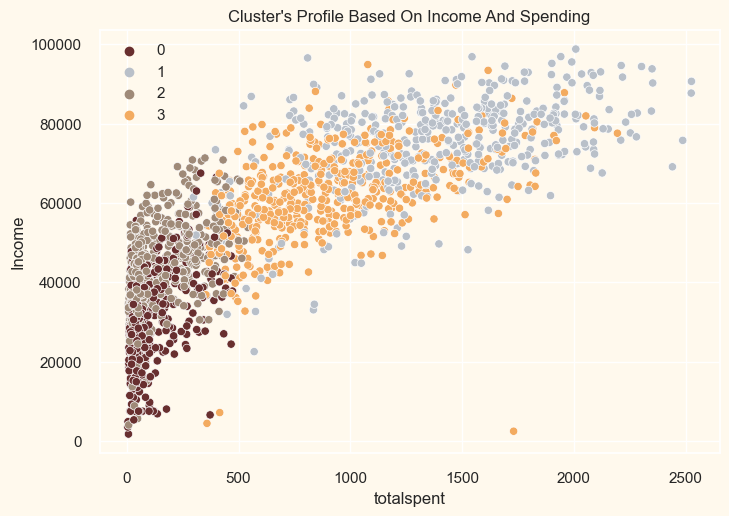

In [38]:
pl = sns.scatterplot(data = df,x=df["totalspent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544:

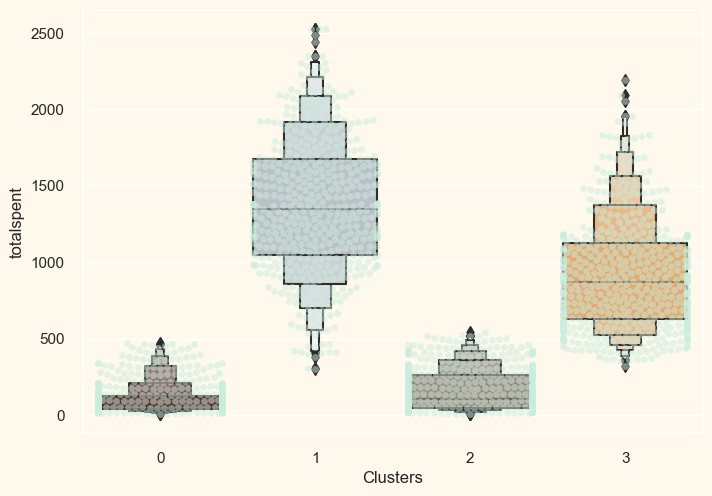

In [39]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["totalspent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["totalspent"], palette=pal)
plt.show()


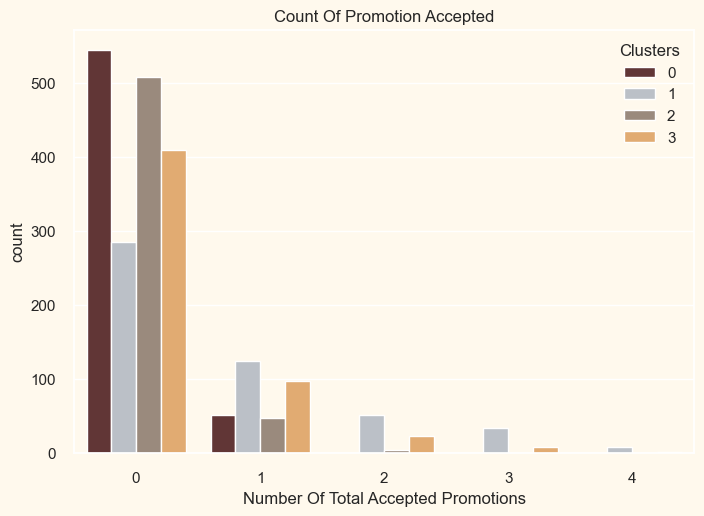

In [40]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
# df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4",
#     "AcceptedCmp5","Total_Promos"]][df['Total_Promos']==4]
# Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option i

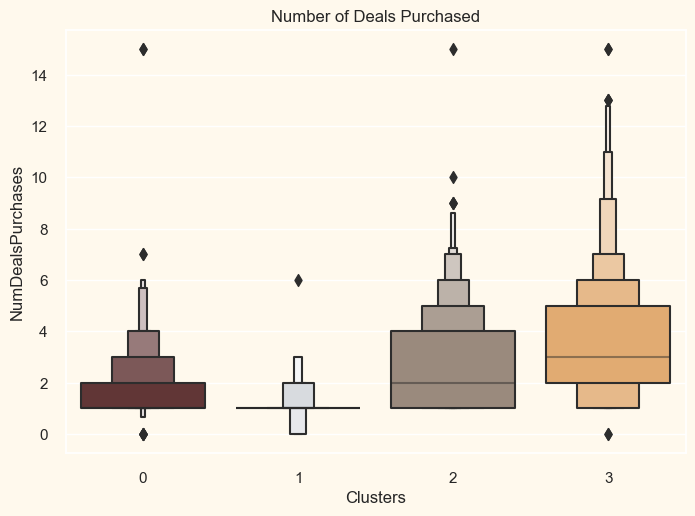

In [41]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

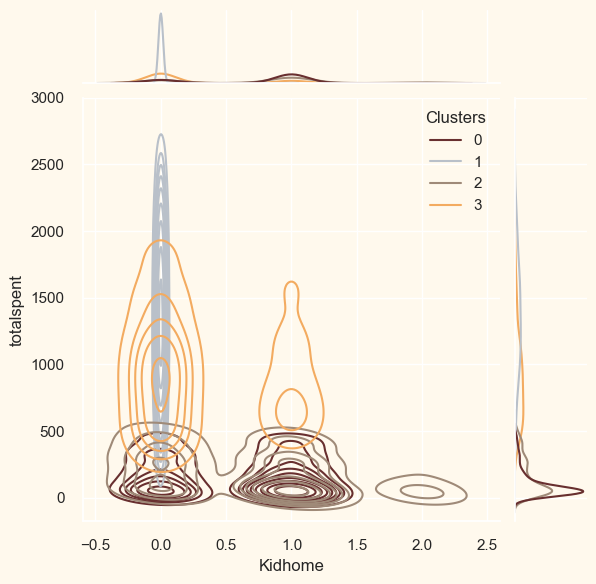

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

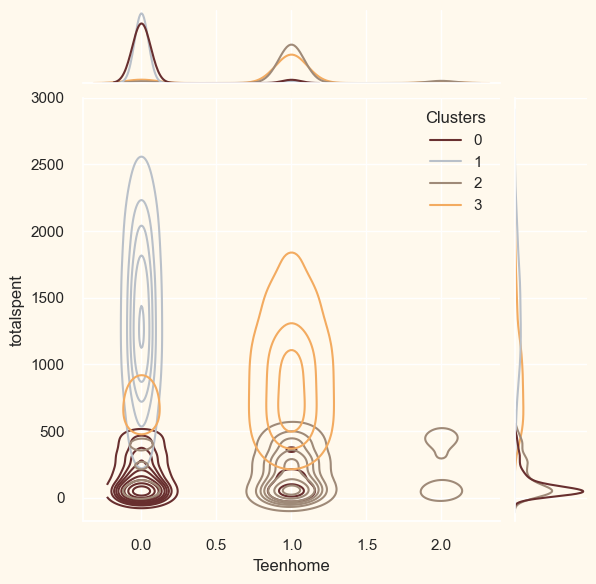

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

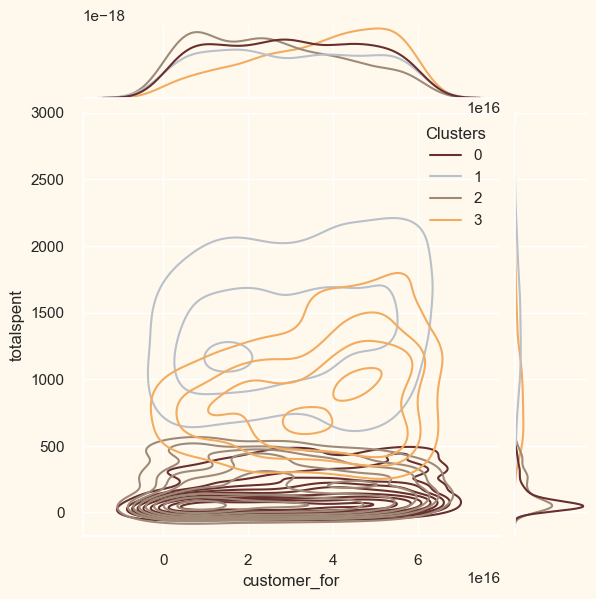

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

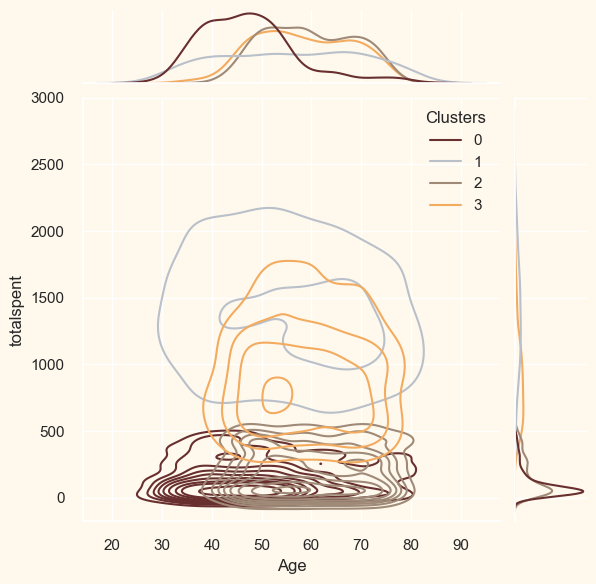

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

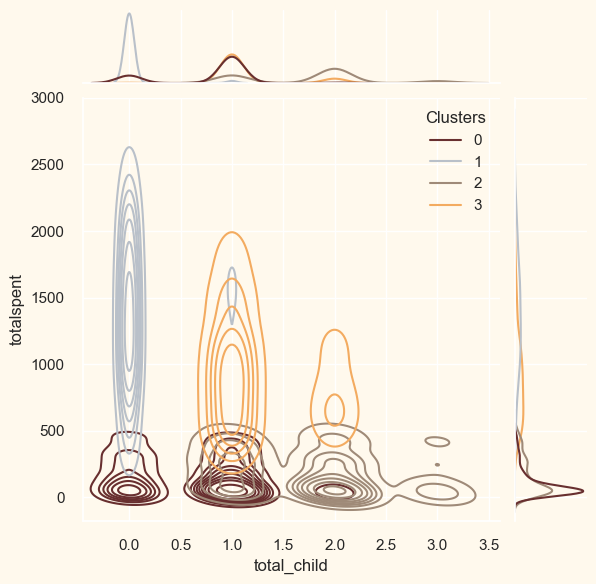

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

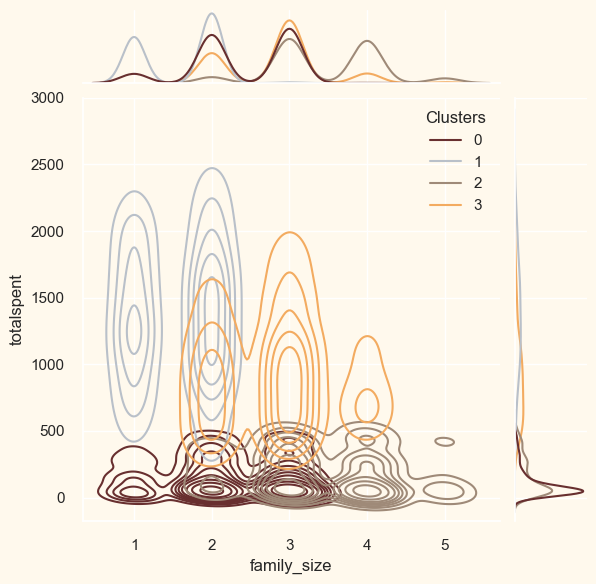

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

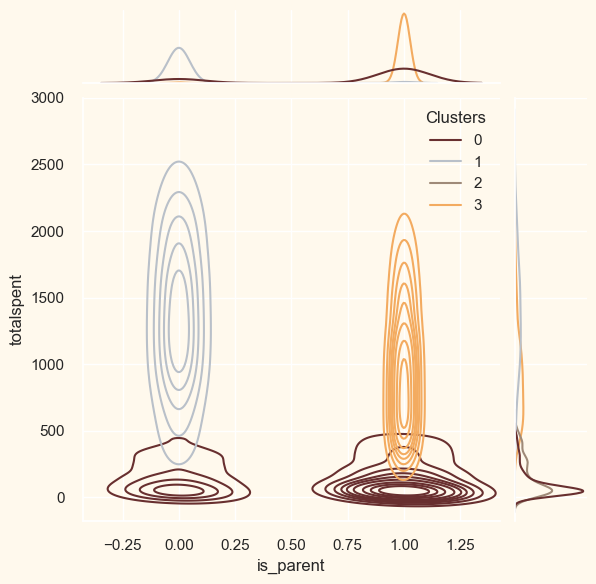

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

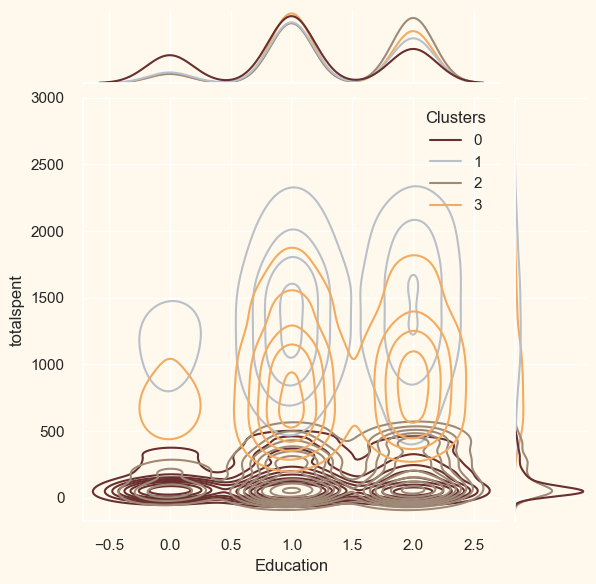

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

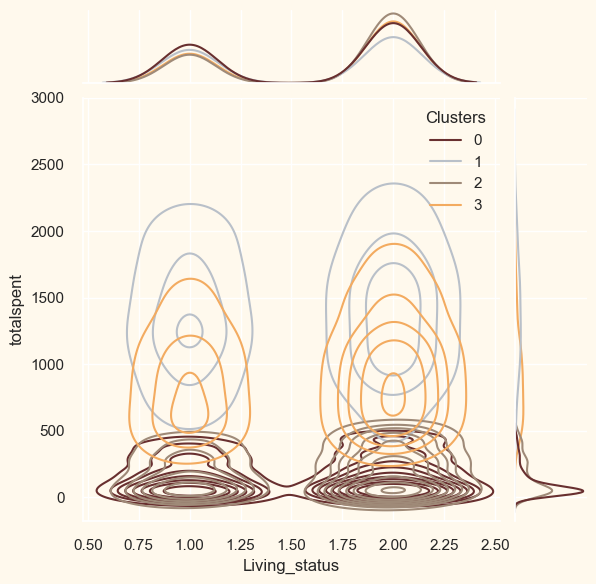

In [42]:
Personal = [ "Kidhome","Teenhome","customer_for", "Age", "total_child", "family_size", 
            "is_parent", "Education","Living_status"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["totalspent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

# Creating data model for prediction

In [81]:
dfm = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [82]:
dfm.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [83]:
## redundant and unecessary columns
columns_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds','ID',]
columns_drop2 = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
columns_drop3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']

# calculating the target variable

dfm['total_spent'] = dfm['MntWines'] + dfm['MntFruits'] + dfm['MntMeatProducts'] + dfm['MntSweetProducts'] + dfm['MntSweetProducts'] + dfm['MntGoldProds']

# calculating the total purchases

dfm['total_purchases'] = dfm['NumWebPurchases'] + dfm['NumCatalogPurchases'] +  dfm['NumStorePurchases']

# calculating the age of the cusomters
dfm['Age'] = datetime.now().year - dfm['Year_Birth']

# remapping the marital status
dfm['Living_status'] = dfm.Marital_Status.replace({"Married":2, "Together":2
                                                 , "Absurd":1, 
                                                 "Widow":1, "YOLO":1, 
                                                 "Divorced":1, "Single":1, "Alone":1})

## remapping the education status

dfm["Education"]=dfm["Education"].replace({"Basic":1,"2n Cycle":1,
                                             "Graduation":2, 
                                             "Master":3, "PhD":3})





/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_51598/3102342832.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfm['Living_status'] = dfm.Marital_Status.replace({"Married":2, "Together":2
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_51598/3102342832.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfm["Education"]=dfm["Education"].replace({"Basic":1,"2n Cycle":1,


In [84]:
dfm.head()

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2         Single  58138.0        0         0   
1  2174        1954          2         Single  46344.0        1         1   
2  4141        1965          2       Together  71613.0        0         0   
3  6182        1984          2       Together  26646.0        1         0   
4  5324        1981          3        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  04-09-2012       58       635  ...             0             0         0   
1  08-03-2014       38        11  ...             0             0         0   
2  21-08-2013       26       426  ...             0             0         0   
3  10-02-2014       26        11  ...             0             0         0   
4  19-01-2014       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  total_spent  total_purchases  Age  \
0              3         11         1         1533               22   67   
1              3         11         0           26                4   70   
2              3         11         0          686               20   59   
3              3         11         0           46                6   40   
4              3         11         0          403               14   43   

   Living_status  
0              1  
1              1  
2              2  
3              2  
4              2  

[5 rows x 33 columns]

In [85]:
# dropping the redundant columns
dfm = dfm.drop(columns_drop2, axis = 1)
dfm = dfm.drop(columns_drop3, axis = 1)
dfm = dfm.drop(columns_drop, axis = 1)
dfm = dfm.drop(['Z_CostContact','Z_Revenue'], axis = 1)

In [86]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Birth       2240 non-null   int64  
 1   Education        2240 non-null   int64  
 2   Marital_Status   2240 non-null   object 
 3   Income           2216 non-null   float64
 4   Kidhome          2240 non-null   int64  
 5   Teenhome         2240 non-null   int64  
 6   Dt_Customer      2240 non-null   object 
 7   Recency          2240 non-null   int64  
 8   Complain         2240 non-null   int64  
 9   total_spent      2240 non-null   int64  
 10  total_purchases  2240 non-null   int64  
 11  Age              2240 non-null   int64  
 12  Living_status    2240 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 227.6+ KB


In [87]:
## converting Dt_customer to datetime data type
dfm['Dt_Customer'] = pd.to_datetime(dfm['Dt_Customer'],format='%d-%m-%Y')
dfm['Dt_Customer'].describe()

dfm

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957          2         Single  58138.0        0         0   
1           1954          2         Single  46344.0        1         1   
2           1965          2       Together  71613.0        0         0   
3           1984          2       Together  26646.0        1         0   
4           1981          3        Married  58293.0        1         0   
...          ...        ...            ...      ...      ...       ...   
2235        1967          2        Married  61223.0        0         1   
2236        1946          3       Together  64014.0        2         1   
2237        1981          2       Divorced  56981.0        0         0   
2238        1956          3       Together  69245.0        0         1   
2239        1954          3        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  total_spent  total_purchases  Age  \
0     2012-09-04       58         0         1533               22   67   
1     2014-03-08       38         0           26                4   70   
2     2013-08-21       26         0          686               20   59   
3     2014-02-10       26         0           46                6   40   
4     2014-01-19       94         0          403               14   43   
...          ...      ...       ...          ...              ...  ...   
2235  2013-06-13       46         0         1417               16   57   
2236  2014-06-10       56         0          444               15   78   
2237  2014-01-25       91         0         1221               18   43   
2238  2014-01-24        8         0          793               21   68   
2239  2012-10-15       40         0          171                8   70   

      Living_status  
0                 1  
1                 1  
2                 2  
3                 2  
4                 2  
...             ...  
2235              2  
2236              2  
2237              1  
2238              2  
2239              2  

[2240 rows x 13 columns]

In [88]:
## checking the days the customer has been engaged with the business relative to the lates customer

dfm['customer_for'] = pd.to_numeric(dfm['Dt_Customer'].max() - dfm['Dt_Customer'],errors="coerce")

dfm = dfm.drop(['Year_Birth','Marital_Status','Dt_Customer'], axis = 1)

dfm.head()

Education   Income  Kidhome  Teenhome  Recency  Complain  total_spent  \
0          2  58138.0        0         0       58         0         1533   
1          2  46344.0        1         1       38         0           26   
2          2  71613.0        0         0       26         0          686   
3          2  26646.0        1         0       26         0           46   
4          3  58293.0        1         0       94         0          403   

   total_purchases  Age  Living_status       customer_for  
0               22   67              1  57283200000000000  
1                4   70              1   9763200000000000  
2               20   59              2  26956800000000000  
3                6   40              2  12009600000000000  
4               14   43              2  13910400000000000

### We can see that all the columns are now in numeric values

In [89]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2240 non-null   int64  
 1   Income           2216 non-null   float64
 2   Kidhome          2240 non-null   int64  
 3   Teenhome         2240 non-null   int64  
 4   Recency          2240 non-null   int64  
 5   Complain         2240 non-null   int64  
 6   total_spent      2240 non-null   int64  
 7   total_purchases  2240 non-null   int64  
 8   Age              2240 non-null   int64  
 9   Living_status    2240 non-null   int64  
 10  customer_for     2240 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 192.6 KB


In [90]:
dfm.isna().sum()

Education           0
Income             24
Kidhome             0
Teenhome            0
Recency             0
Complain            0
total_spent         0
total_purchases     0
Age                 0
Living_status       0
customer_for        0
dtype: int64

In [91]:
dfm.dropna()

Education   Income  Kidhome  Teenhome  Recency  Complain  total_spent  \
0             2  58138.0        0         0       58         0         1533   
1             2  46344.0        1         1       38         0           26   
2             2  71613.0        0         0       26         0          686   
3             2  26646.0        1         0       26         0           46   
4             3  58293.0        1         0       94         0          403   
...         ...      ...      ...       ...      ...       ...          ...   
2235          2  61223.0        0         1       46         0         1417   
2236          3  64014.0        2         1       56         0          444   
2237          2  56981.0        0         0       91         0         1221   
2238          3  69245.0        0         1        8         0          793   
2239          3  52869.0        1         1       40         0          171   

      total_purchases  Age  Living_status       customer_for  
0                  22   67              1  57283200000000000  
1                   4   70              1   9763200000000000  
2                  20   59              2  26956800000000000  
3                   6   40              2  12009600000000000  
4                  14   43              2  13910400000000000  
...               ...  ...            ...                ...  
2235               16   57              2  32918400000000000  
2236               15   78              2   1641600000000000  
2237               18   43              1  13392000000000000  
2238               21   68              2  13478400000000000  
2239                8   70              2  53740800000000000  

[2216 rows x 11 columns]

In [92]:
dfm = dfm[dfm['Age']<90]
dfm = dfm[dfm['Income']100000]
dfm

Education    Income  Kidhome  Teenhome  Recency  Complain  total_spent  \
124           2  101970.0        0         0       69         0         1163   
164           3  157243.0        0         1       98         0         1609   
203           3  102160.0        0         0       54         0         1340   
252           2  102692.0        0         0        5         0         1252   
617           3  162397.0        1         1       31         0          106   
646           2  105471.0        0         0       36         0         1543   
655           2  153924.0        0         0       81         0            6   
687           3  160803.0        0         0       21         0         1703   
1300          3  157733.0        1         0       37         0           57   
1653          2  157146.0        0         0       13         0         1729   
1898          3  113734.0        0         0        9         0          538   
2132          3  156924.0        0         0       85         0            8   
2233          2  666666.0        1         0       23         0           55   

      total_purchases  Age  Living_status       customer_for  
124                27   41              1  40953600000000000  
164                22   51              2  10368000000000000  
203                26   47              2  52185600000000000  
252                28   50              1  38880000000000000  
617                 1   48              2  33782400000000000  
646                30   54              2  45273600000000000  
655                 0   49              1  12268800000000000  
687                29   42              2  59961600000000000  
1300                2   53              2  33696000000000000  
1653               28   47              2  36806400000000000  
1898               27   79              1   2764800000000000  
2132                0   75              2  26265600000000000  
2233                7   47              2  33868800000000000

13